In [16]:
import pandas as pd
import matplotlib.pyplot as pltdf
ac= pd.read_csv("C:\\Users\\nicol\\Desktop\\financial_risk_assessment2.csv")


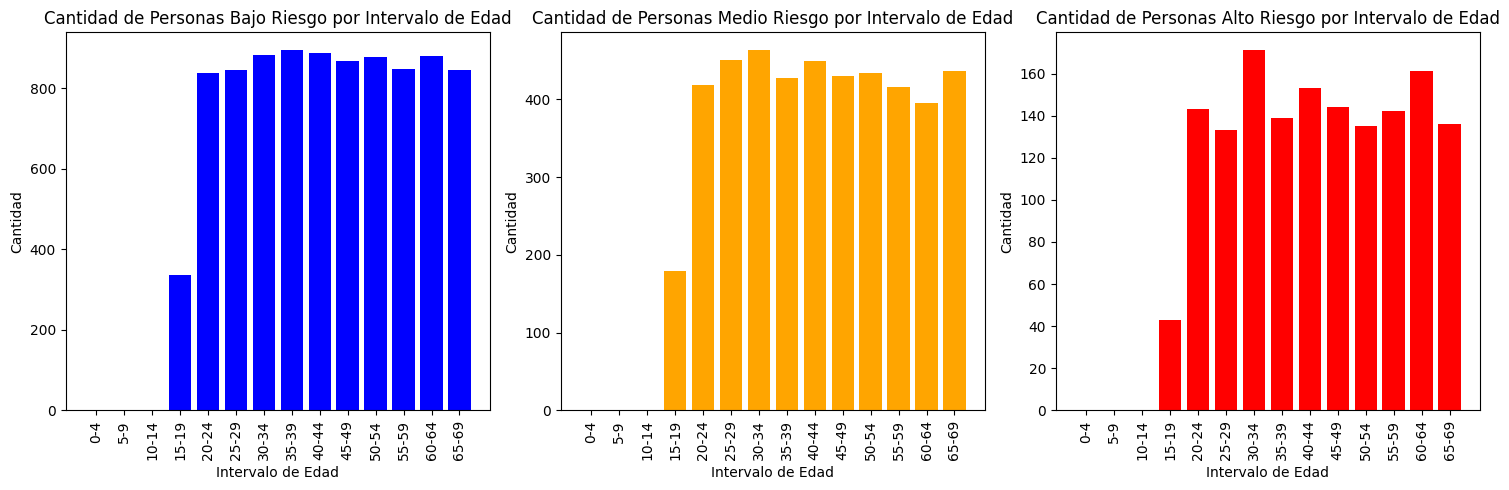

In [21]:
#Intervalos de edad
intervalo = range(0, ac['Age'].max() + 5, 5)
etiqueta = [f'{i}-{i+4}' for i in intervalo[:-1]]

# Agregar una columna de intervalos de edad al DataFrame
ac['intervalo por edad'] = pd.cut(ac['Age'], bins=intervalo, labels=etiqueta, right=False)

# Filtro por cada nivel de riesgo
rankingderiesgo_bajo = ac[ac['Risk Rating'] == 'Low']
rankingderiesgo_medio = ac[ac['Risk Rating'] == 'Medium']
rankingderiesgo_alto = ac[ac['Risk Rating'] == 'High']

# Contar por intervalo de edad para cada nivel de riesgo
contar_bajo_riesgo = rankingderiesgo_bajo['intervalo por edad'].value_counts().sort_index().reset_index()
contar_medio_riesgo = rankingderiesgo_medio['intervalo por edad'].value_counts().sort_index().reset_index()
contar_alto_riesgo = rankingderiesgo_alto['intervalo por edad'].value_counts().sort_index().reset_index()

# Renombrar las columnas
contar_bajo_riesgo.columns = ['intervalo por edad', 'cantidad de personas bajo riesgo']
contar_medio_riesgo.columns = ['intervalo por edad', 'cantidad de personas medio riesgo']
contar_alto_riesgo.columns = ['intervalo por edad', 'cantidad de personas alto riesgo']

# Configurar la figura para los gráficos
plt.figure(figsize=(15, 5))

# Graficar la tabla de riesgo bajo
plt.subplot(1, 3, 1)
plt.bar(contar_bajo_riesgo['intervalo por edad'], contar_bajo_riesgo['cantidad de personas bajo riesgo'], color='blue')
plt.title('Cantidad de Personas Bajo Riesgo por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Graficar la tabla de riesgo medio
plt.subplot(1, 3, 2)
plt.bar(contar_medio_riesgo['intervalo por edad'], contar_medio_riesgo['cantidad de personas medio riesgo'], color='orange')
plt.title('Cantidad de Personas Medio Riesgo por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Graficar la tabla de riesgo alto
plt.subplot(1, 3, 3)
plt.bar(contar_alto_riesgo['intervalo por edad'], contar_alto_riesgo['cantidad de personas alto riesgo'], color='red')
plt.title('Cantidad de Personas Alto Riesgo por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()
